In [35]:
from collections import Counter
import random
import time
from operator import countOf
import timeit
import perfplot
import numpy as np
import pandas as pd

In [ ]:
def create_count_list(occ, size):
    pos = ['count_%02d'%(i) for i in range(occ)] # list of possible occurences
    lst = [random.choice(pos) for i in range(size)] # 250.000 random choice of items in pos list
    return lst

def counter(lst):
    return Counter(lst).most_common(1)[0]

def countof(lst):
    return sorted([(i, countOf(lst, i)) for i in set(lst)], key=lambda tup: tup[1], reverse=True)[0]

def count_dict(lst):
    d = dict((i, lst.count(i)) for i in set(lst))
    return sorted(d.items(), key=lambda item: item[1], reverse=True)[0]

def pandas_counts(lst):
    return list(pd.Series(lst).value_counts().items())[0]

# Function results and timeit check

In [ ]:
lst = create_count_list(100, 25000)
print(counter(lst), countof(lst), count_dict(lst), pandas_counts(lst))

In [37]:
%%timeit -r 5 -n 1000
r1 = counter(lst)

700 µs ± 6.87 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)


In [38]:
%%timeit -r 5 -n 1000
r2 = countof(lst)

41.6 ms ± 349 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)


In [39]:
%%timeit -r 5 -n 1000
r3 = count_dict(lst)

34.6 ms ± 146 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)


In [40]:
%%timeit -r 5 -n 1000
r4 = pandas_counts(lst)

1.58 ms ± 12.8 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)


# Scaling

Output()

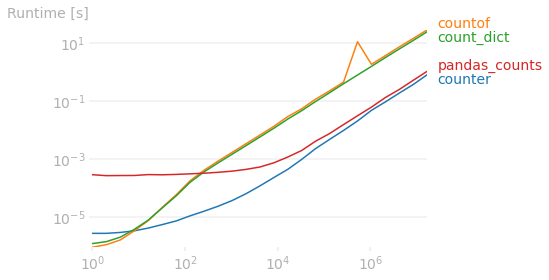

In [45]:
perfplot.show(setup=lambda n: create_count_list(100, n),
              n_range=[2**k for k in range(25)],
              kernels=[counter, countof, count_dict, pandas_counts],
              equality_check=None,
              logx=True,
              logy=True)